In [1]:
%pip install yfinance pandas matplotlib


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------------------------- ------------ 2.1/3.0 MB 11.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 10.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=61420603dc022d0e9bee64a0691e98d24daac91eba2df521a79ff312b22744dd
  Stored in directory: c:\users\comp\appdata\local\pip\cache\wheels\a4\4c\13\c0145c208d813977081d42e2a47d72acb3efc4a6965ab57804
Successfully built peewee


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Fetching the Share Market Dataset
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2025-03-01"

stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data.to_csv("AAPL_stock_data.csv")
print(stock_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907700  127.181268  123.642412  125.431607   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


In [3]:
print("Dataset Shape:", stock_data.shape)
print("\nBasic Statistics:")
print(stock_data.describe())

Dataset Shape: (541, 5)

Basic Statistics:
Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   541.000000  541.000000  541.000000  541.000000  5.410000e+02
mean    192.309393  193.883161  190.454178  192.036779  5.778716e+07
std      29.885142   30.119642   29.551135   29.886695  2.473694e+07
min     123.583099  126.301493  122.742873  124.561717  2.323470e+07
25%     171.808746  172.846884  169.992840  171.364040  4.468600e+07
50%     186.503082  187.783307  185.428702  186.728906  5.245640e+07
75%     222.230896  224.745359  219.890965  222.121137  6.475140e+07
max     258.735504  259.814335  257.347047  257.906429  3.186799e+08


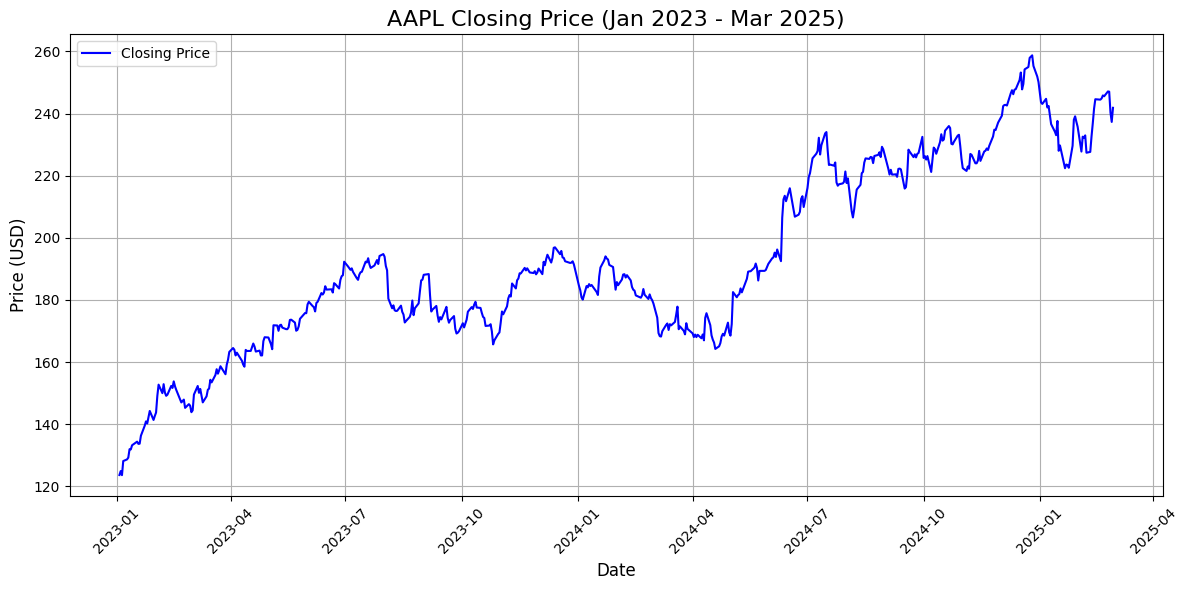

In [4]:
# Line Plot of Closing Price
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
plt.title('AAPL Closing Price (Jan 2023 - Mar 2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Candlestick Chart
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


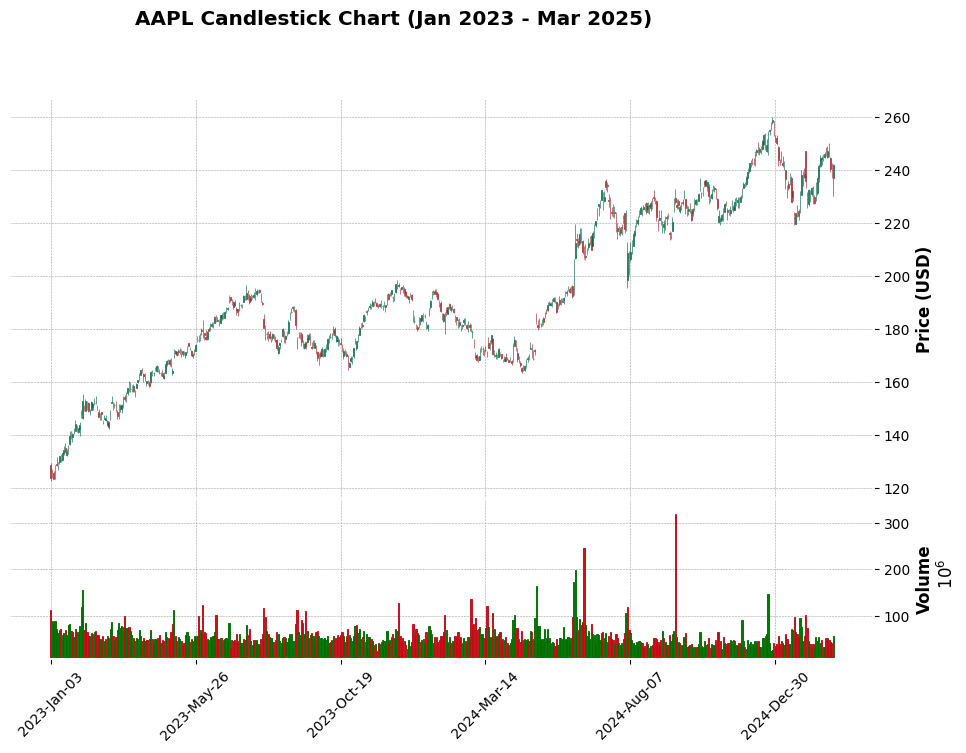

In [9]:
import mplfinance as mpf

# Flatten the column names
stock_data.columns = stock_data.columns.get_level_values(0)

mpf.plot(stock_data, type='candle', style='charles', 
         title='AAPL Candlestick Chart (Jan 2023 - Mar 2025)',
         ylabel='Price (USD)', volume=True, 
         ylabel_lower='Volume', figsize=(12, 8))

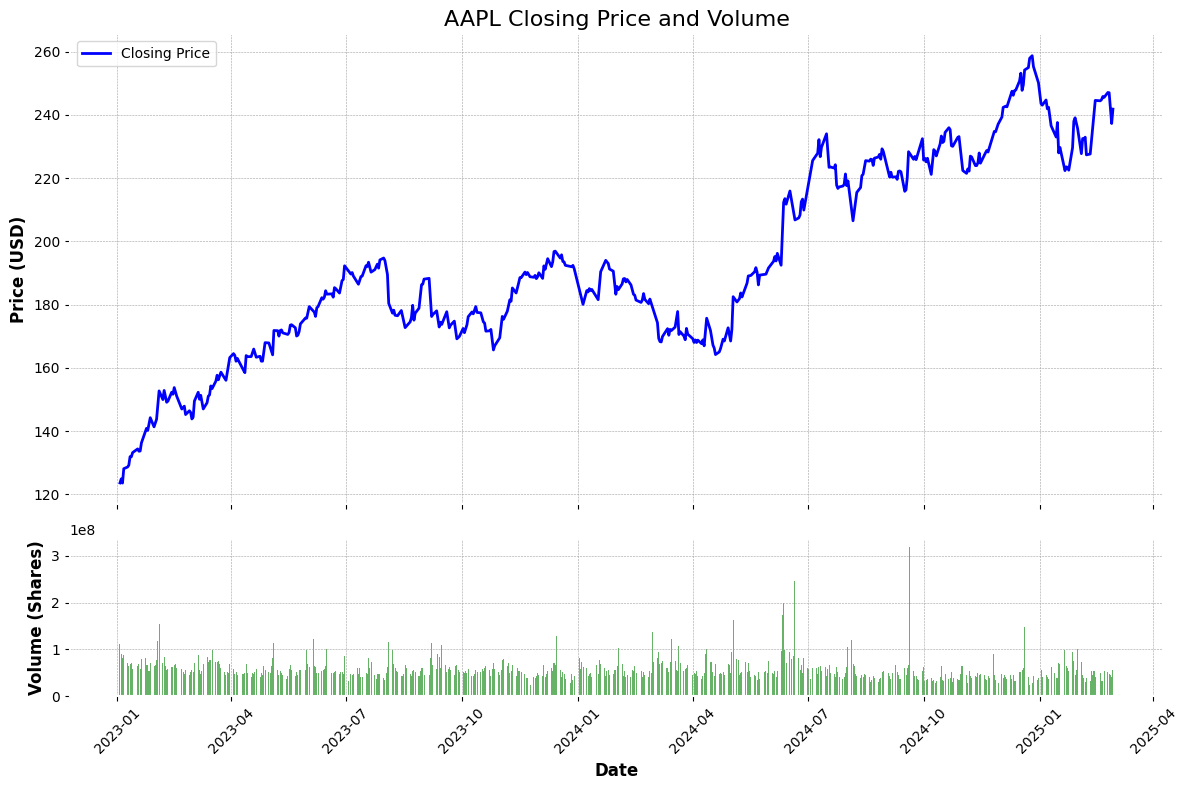

In [10]:
# Combined Price and Volume Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax1.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
ax1.set_title('AAPL Closing Price and Volume', fontsize=16)
ax1.set_ylabel('Price (USD)', fontsize=12)
ax1.grid(True)
ax1.legend()
ax2.bar(stock_data.index, stock_data['Volume'], color='green', alpha=0.6)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Volume (Shares)', fontsize=12)
ax2.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

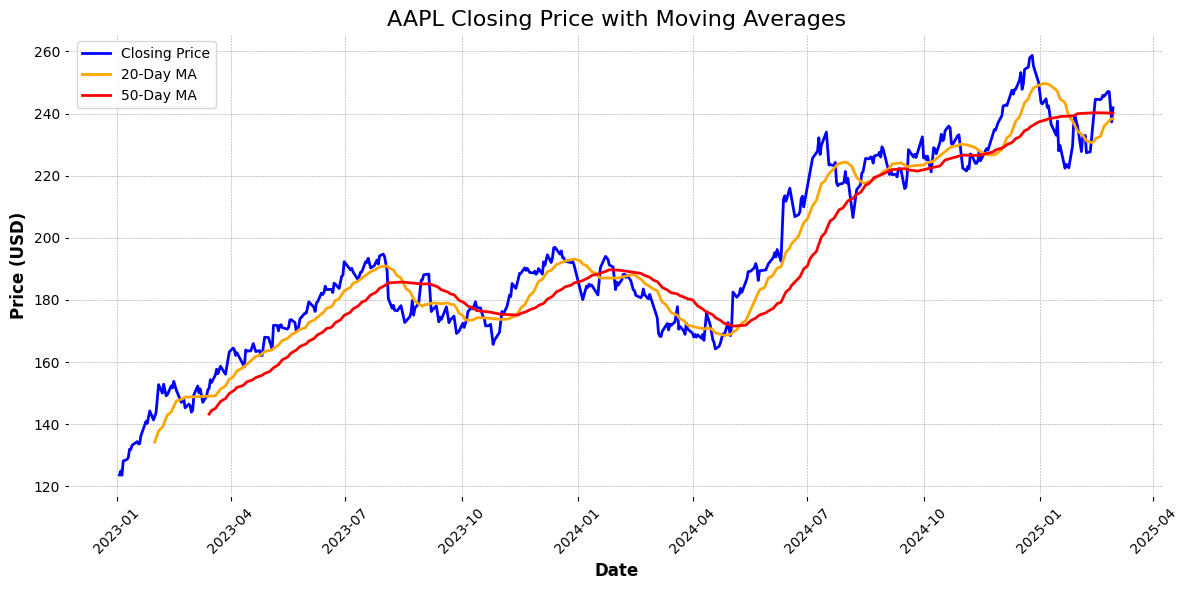

In [11]:
# Adding Moving Averages
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
plt.plot(stock_data.index, stock_data['MA20'], label='20-Day MA', color='orange')
plt.plot(stock_data.index, stock_data['MA50'], label='50-Day MA', color='red')
plt.title('AAPL Closing Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Saving Your Work
plt.savefig('AAPL_price_volume.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

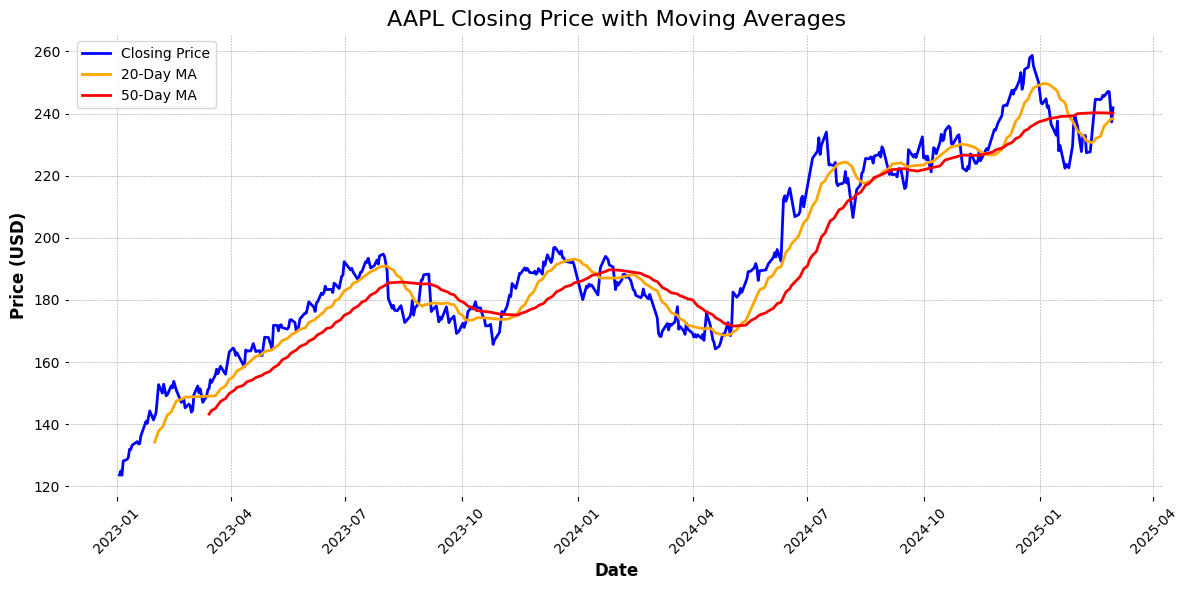

In [13]:
# Save the combined price and volume plot
fig.savefig('AAPL_closing_price_volume.png', dpi=300, bbox_inches='tight')

# Save the moving averages plot
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
plt.plot(stock_data.index, stock_data['MA20'], label='20-Day MA', color='orange')
plt.plot(stock_data.index, stock_data['MA50'], label='50-Day MA', color='red')
plt.title('AAPL Closing Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('AAPL_closing_price_moving_averages.png', dpi=300, bbox_inches='tight')
plt.show()